<a href="https://colab.research.google.com/github/Vaycold/tensorflow_tutorial/blob/main/%233.%EA%B8%B0%EB%B3%B8%20%ED%85%8D%EC%8A%A4%ED%8A%B8%20%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.5.0


In [6]:
# Load the IMDB Dataset
imdb = keras.datasets.imdb
(train_data, train_labels) , (test_data, test_labels) = imdb.load_data(num_words = 10000)
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

(25000,) (25000,)
(25000,) (25000,)


In [5]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(25000,) (25000,)
(25000,) (25000,)


In [11]:
print(train_data[0][:10])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]


In [12]:
print(train_labels[0])

1


In [14]:
# 길이가 텍스트 마다 다름
for i in range(10) :
    print(f'{i+1} 번째 길이 : {len(train_data[i])}')

1 번째 길이 : 218
2 번째 길이 : 189
3 번째 길이 : 141
4 번째 길이 : 550
5 번째 길이 : 147
6 번째 길이 : 43
7 번째 길이 : 123
8 번째 길이 : 562
9 번째 길이 : 233
10 번째 길이 : 130


In [26]:
# 정수 -> 단어
word_index = imdb.get_word_index()

In [27]:
word_index = {k : v+3 for k,v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>'] = 3

In [28]:
reverse_word_index = {v : k for k,v in word_index.items()}

In [31]:
for i in range(10) :
    print(reverse_word_index[i])

<PAD>
<START>
<UNK>
<UNUSED>
the
and
a
of
to
is


In [32]:
def decode_review(text) :
    return ' '.join([reverse_word_index.get(i,'?') for i in text])

In [34]:
decode_review(train_data[0][:30])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing"

## Prepare the Data

In [36]:
word_index['<PAD>']

0

In [37]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, 
                                                           value = word_index['<PAD>'],
                                                           padding = 'post',
                                                           maxlen = 256)

test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, 
                                                           value = word_index['<PAD>'],
                                                           padding = 'post',
                                                           maxlen = 256)

In [39]:
# 길이 맞춤
for i in range(10) :
    print(f'{i+1} 번째 길이 : {len(train_data[i])}')

1 번째 길이 : 256
2 번째 길이 : 256
3 번째 길이 : 256
4 번째 길이 : 256
5 번째 길이 : 256
6 번째 길이 : 256
7 번째 길이 : 256
8 번째 길이 : 256
9 번째 길이 : 256
10 번째 길이 : 256


In [41]:
train_data[0][200:]

array([  38, 1334,   88,   12,   16,  283,    5,   16, 4472,  113,  103,
         32,   15,   16, 5345,   19,  178,   32,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

## Modeling

In [45]:
vocab_size = 1e+4
model = keras.Sequential()
model.add(keras.layers.Embedding(int(vocab_size), 16, input_shape = (None, ))) #output : (batch, sequence, embedding)
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [49]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [50]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs = 40,
                    batch_size = 512,
                    validation_data = (x_val, y_val),
                    verbose = 1)

Epoch 1/40
30/30 [==============================] - 2s 23ms/step - loss: 0.6915 - accuracy: 0.5778 - val_loss: 0.6893 - val_accuracy: 0.6360
Epoch 2/40
30/30 [==============================] - 1s 18ms/step - loss: 0.6855 - accuracy: 0.6679 - val_loss: 0.6816 - val_accuracy: 0.6996
Epoch 3/40
30/30 [==============================] - 1s 17ms/step - loss: 0.6728 - accuracy: 0.7306 - val_loss: 0.6647 - val_accuracy: 0.7448
Epoch 4/40
30/30 [==============================] - 1s 18ms/step - loss: 0.6472 - accuracy: 0.7675 - val_loss: 0.6333 - val_accuracy: 0.7712
Epoch 5/40
30/30 [==============================] - 1s 18ms/step - loss: 0.6073 - accuracy: 0.7951 - val_loss: 0.5937 - val_accuracy: 0.7892
Epoch 6/40
30/30 [==============================] - 1s 18ms/step - loss: 0.5600 - accuracy: 0.8179 - val_loss: 0.5482 - val_accuracy: 0.8094
Epoch 7/40
30/30 [==============================] - 1s 18ms/step - loss: 0.5098 - accuracy: 0.8353 - val_loss: 0.5031 - val_accuracy: 0.8253
Epoch 8/40
30

In [51]:
# Evaluate Model
result = model.evaluate(test_data, test_labels, verbose =2)
print(result)

782/782 - 1s - loss: 0.3442 - accuracy: 0.8706
[0.344197541475296, 0.8705599904060364]


In [53]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

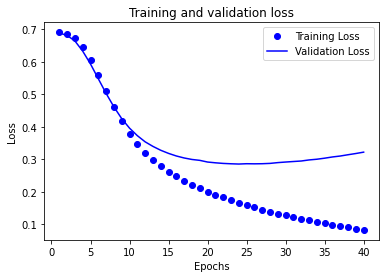

In [54]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

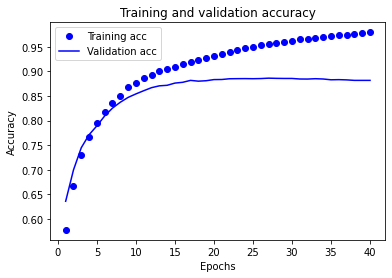

In [55]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()